In [1]:
import pandas as pd 
import numpy as np
from sklearn import metrics

from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [3]:
# Dataset ----
mpg_df = pd.read_csv("https://raw.githubusercontent.com/mwaskom/seaborn-data/master/mpg.csv")
mpg_df

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790,15.6,82,usa,ford mustang gl
394,44.0,4,97.0,52.0,2130,24.6,82,europe,vw pickup
395,32.0,4,135.0,84.0,2295,11.6,82,usa,dodge rampage
396,28.0,4,120.0,79.0,2625,18.6,82,usa,ford ranger


### Linear regression: MPG vs Weight
#### Ordinary least squares (OLS)

In [5]:
df = mpg_df[["mpg", "weight"]]
df

,mpg,weight
0,18.0,3504
1,15.0,3693
2,18.0,3436
3,16.0,3433
4,17.0,3449
...,...,...
393,27.0,2790
394,44.0,2130
395,32.0,2295
396,28.0,2625


In [9]:
y = mpg_df.mpg
x = mpg_df[["weight"]]

#### Fitting 

In [16]:
model_lr = LinearRegression().fit(x, y)
model_lr

LinearRegression()

In [18]:
model_lr.coef_
model_lr.intercept_

46.31736442026565

### Results

In [22]:
r2_score(
    y_true = df.mpg, y_pred = model_lr.predict(x)
)
print(f"R^2 is {r2_score(y_true = df.mpg, y_pred = model_lr.predict(x))}")

R^2 is 0.6917929800341573


----

# Visualization

In [26]:
from plotnine import ggplot, aes, geom_point, geom_line
from plotnine.themes import theme_minimal

df["fitted"] = model_lr.predict(x)
df

C:\Users\user\AppData\Local\Temp/ipykernel_38752/2553004054.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,mpg,weight,fitted
0,18.0,3504,19.418523
1,15.0,3693,17.967643
2,18.0,3436,19.940532
3,16.0,3433,19.963562
4,17.0,3449,19.840736
...,...,...,...
393,27.0,2790,24.899622
394,44.0,2130,29.966185
395,32.0,2295,28.699544
396,28.0,2625,26.166263


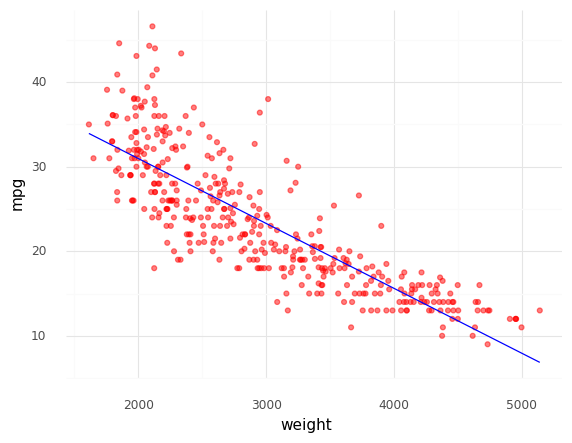

<ggplot: (86006818964)>

In [27]:
ggplot(aes("weight", "mpg"), df) \
    + geom_point(alpha=0.5, color="red") \
    + geom_line(aes(y = "fitted"), color="blue")\
    + theme_minimal()

In [28]:
import matplotlib.pyplot as plt 

<Figure size 1584x1584 with 0 Axes>

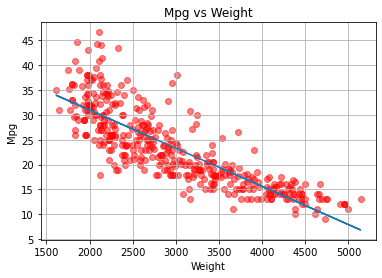

<Figure size 1584x1584 with 0 Axes>

In [54]:
fig, ax = plt.subplots()
ax.scatter(df["weight"], df["mpg"], color="red", alpha=0.5)
ax.set_xlabel("Weight")
ax.set_ylabel("Mpg")
ax.set_title("Mpg vs Weight")
ax.plot(df["weight"], df["fitted"])
ax.grid()
plt.figure(figsize=[22, 22])